In [ ]:
# 1. IMPORTS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# 2. CHARGEMENT ET APERÇU
file_path = "C:\default of credit card clients.xls"

df = pd.read_excel(file_path, header=1)

print("=== INFORMATIONS GÉNÉRALES ===")
print(f"- Nombre de lignes : {df.shape[0]}")
print(f"- Nombre de colonnes : {df.shape[1]}\n")
print("=== APERÇU DES 5 PREMIÈRES LIGNES ===")
print(df.head(), "\n")
print("=== TYPES DES VARIABLES ===")
print(df.dtypes, "\n")
print("=== VALEURS MANQUANTES PAR COLONNE ===")
print(df.isnull().sum())



=== INFORMATIONS GÉNÉRALES ===
- Nombre de lignes : 30000
- Nombre de colonnes : 25

=== APERÇU DES 5 PREMIÈRES LIGNES ===
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      191

In [8]:
# 3. NETTOYAGE & PRÉPARATION
print("\n=== ÉTAPE 2 : NETTOYAGE DES DONNÉES ===")

# 3.1 Copie du dataframe brut
df_clean = df.copy()

# 3.2 Renommage de la colonne cible
df_clean = df_clean.rename(columns={'default payment next month': 'DEFAULT'})

# 3.3 Nettoyage des variables catégorielles
df_clean['DEFAULT'] = pd.to_numeric(df_clean['DEFAULT'], errors='coerce').fillna(0).astype(int)
df_clean['EDUCATION'] = df_clean['EDUCATION'].replace({0: 4, 5: 4, 6: 4})  # 4 = autre
df_clean['MARRIAGE'] = df_clean['MARRIAGE'].replace({0: 3})                # 3 = autre

# 3.4 Conversion des variables numériques importantes
numeric_cols = [
    'LIMIT_BAL', 'AGE',
    'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',
    'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
    'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'
]
for col in numeric_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce').fillna(0)

print("Types de DEFAULT :", df_clean['DEFAULT'].unique())
print("Aperçu df_clean :")
print(df_clean.head())



=== ÉTAPE 2 : NETTOYAGE DES DONNÉES ===
Types de DEFAULT : [1 0]
Aperçu df_clean :
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

  

In [9]:
# 4. CRÉATION DE VARIABLES DÉRIVÉES
print("\n=== ÉTAPE 3 : VARIABLES MÉTIER ===")

bill_cols = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
pay_cols  = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
pay_status_cols = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

df_clean['MEAN_BILL'] = df_clean[bill_cols].mean(axis=1)
df_clean['MEAN_PAY'] = df_clean[pay_cols].mean(axis=1)
df_clean['PAY_TO_BILL_RATIO'] = df_clean['MEAN_PAY'] / df_clean['MEAN_BILL'].replace(0, np.nan)

df_clean['NB_DELAYS'] = df_clean[pay_status_cols].gt(0).sum(axis=1)
df_clean['MAX_DELAY'] = df_clean[pay_status_cols].max(axis=1)

print("Variables créées : MEAN_BILL, MEAN_PAY, PAY_TO_BILL_RATIO, NB_DELAYS, MAX_DELAY")
print(df_clean[['MEAN_BILL','MEAN_PAY','NB_DELAYS','MAX_DELAY']].head())



=== ÉTAPE 3 : VARIABLES MÉTIER ===
Variables créées : MEAN_BILL, MEAN_PAY, PAY_TO_BILL_RATIO, NB_DELAYS, MAX_DELAY
      MEAN_BILL     MEAN_PAY  NB_DELAYS  MAX_DELAY
0   1284.000000   114.833333          2          2
1   2846.166667   833.333333          2          2
2  16942.166667  1836.333333          0          0
3  38555.666667  1398.000000          0          0
4  18223.166667  9841.500000          0          0



=== ÉTAPE 4 : ANALYSE UNIVARIÉE ===
Taux de défaut global : 22.1%

Statistiques descriptives principales :
            LIMIT_BAL           AGE      MEAN_BILL       MEAN_PAY  \
count    30000.000000  30000.000000   30000.000000   30000.000000   
mean    167484.322667     35.485500   44976.945200    5275.232094   
std     129747.661567      9.217904   63260.721860   10137.946323   
min      10000.000000     21.000000  -56043.166667       0.000000   
25%      50000.000000     28.000000    4781.333333    1113.291667   
50%     140000.000000     34.000000   21051.833333    2397.166667   
75%     240000.000000     41.000000   57104.416667    5583.916667   
max    1000000.000000     79.000000  877313.833333  627344.333333   

          NB_DELAYS  
count  30000.000000  
mean       0.834200  
std        1.554303  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        6.000000  


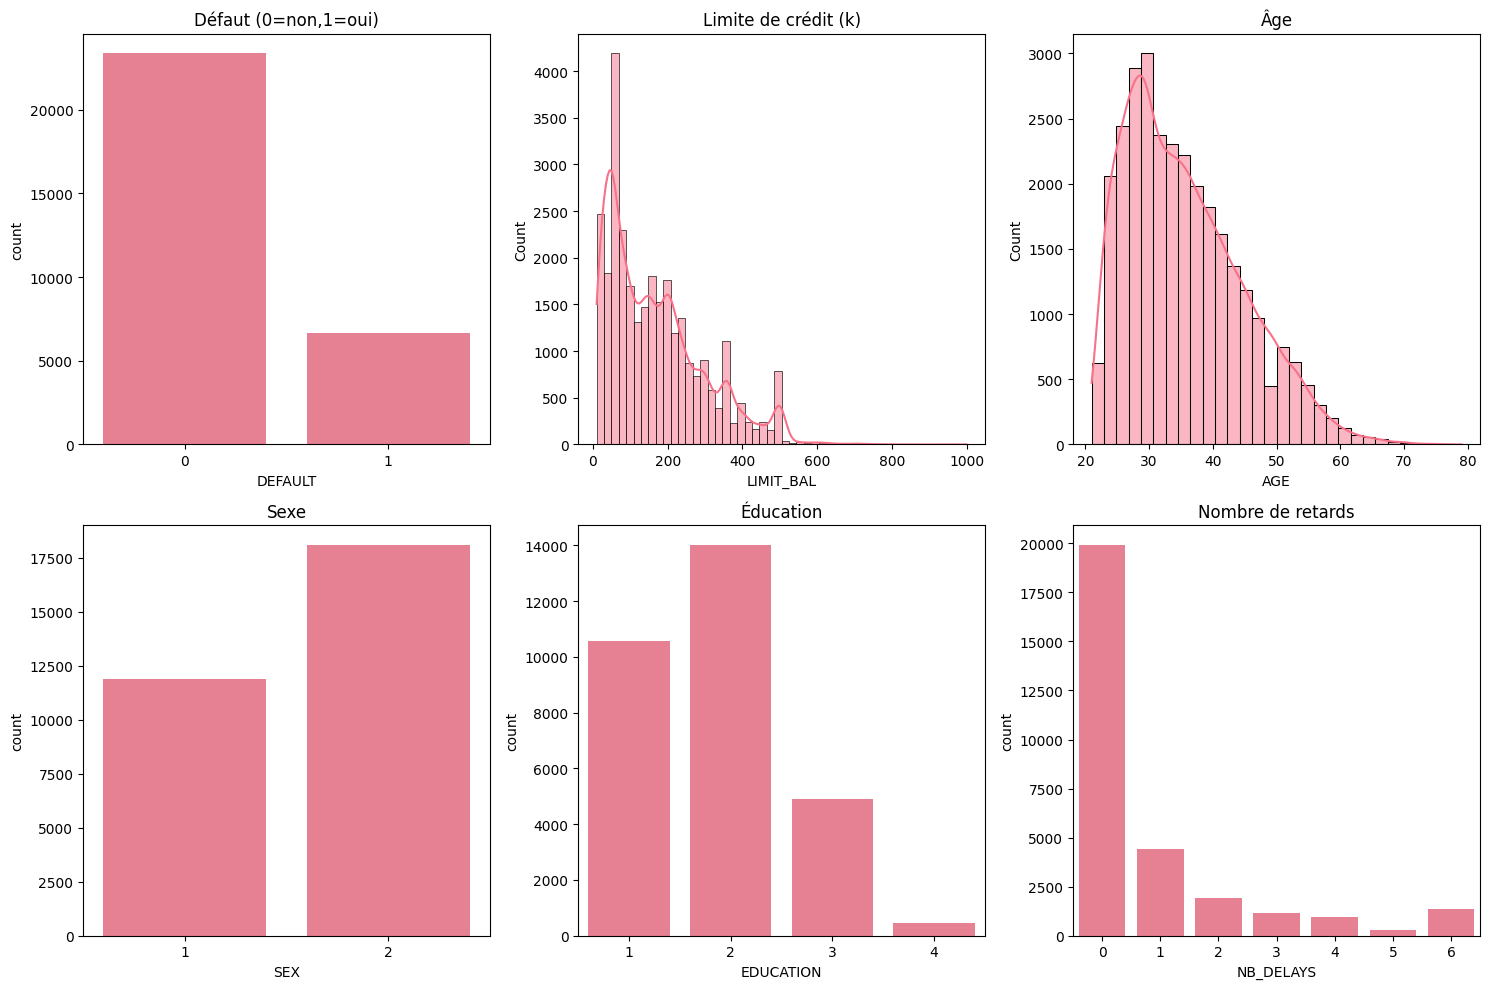

In [10]:
# 5. ANALYSE UNIVARIÉE
print("\n=== ÉTAPE 4 : ANALYSE UNIVARIÉE ===")

taux_defaut = df_clean['DEFAULT'].mean()
print(f"Taux de défaut global : {taux_defaut:.1%}\n")

print("Statistiques descriptives principales :")
print(df_clean[['LIMIT_BAL','AGE','MEAN_BILL','MEAN_PAY','NB_DELAYS']].describe())

# Graphiques
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.countplot(data=df_clean, x='DEFAULT')
plt.title('Défaut (0=non,1=oui)')

plt.subplot(2,3,2)
sns.histplot(df_clean['LIMIT_BAL']/1000, bins=50, kde=True)
plt.title('Limite de crédit (k)')

plt.subplot(2,3,3)
sns.histplot(df_clean['AGE'], bins=30, kde=True)
plt.title('Âge')

plt.subplot(2,3,4)
sns.countplot(data=df_clean, x='SEX')
plt.title('Sexe')

plt.subplot(2,3,5)
sns.countplot(data=df_clean, x='EDUCATION')
plt.title('Éducation')

plt.subplot(2,3,6)
sns.countplot(data=df_clean, x='NB_DELAYS')
plt.title('Nombre de retards')

plt.tight_layout()
plt.show()



=== ÉTAPE 5 : ANALYSE BIVARIÉE ===

Taux de défaut selon SEX (%):
SEX
1    24.2
2    20.8
Name: DEFAULT, dtype: float64

Taux de défaut selon EDUCATION (%):
EDUCATION
1    19.2
2    23.7
3    25.2
4     7.1
Name: DEFAULT, dtype: float64

Taux de défaut selon MARRIAGE (%):
MARRIAGE
1    23.5
2    20.9
3    23.6
Name: DEFAULT, dtype: float64

Taux de défaut selon NB_DELAYS (%):
NB_DELAYS
0    11.7
1    29.8
2    38.8
3    50.9
4    57.3
5    57.4
6    70.3
Name: DEFAULT, dtype: float64


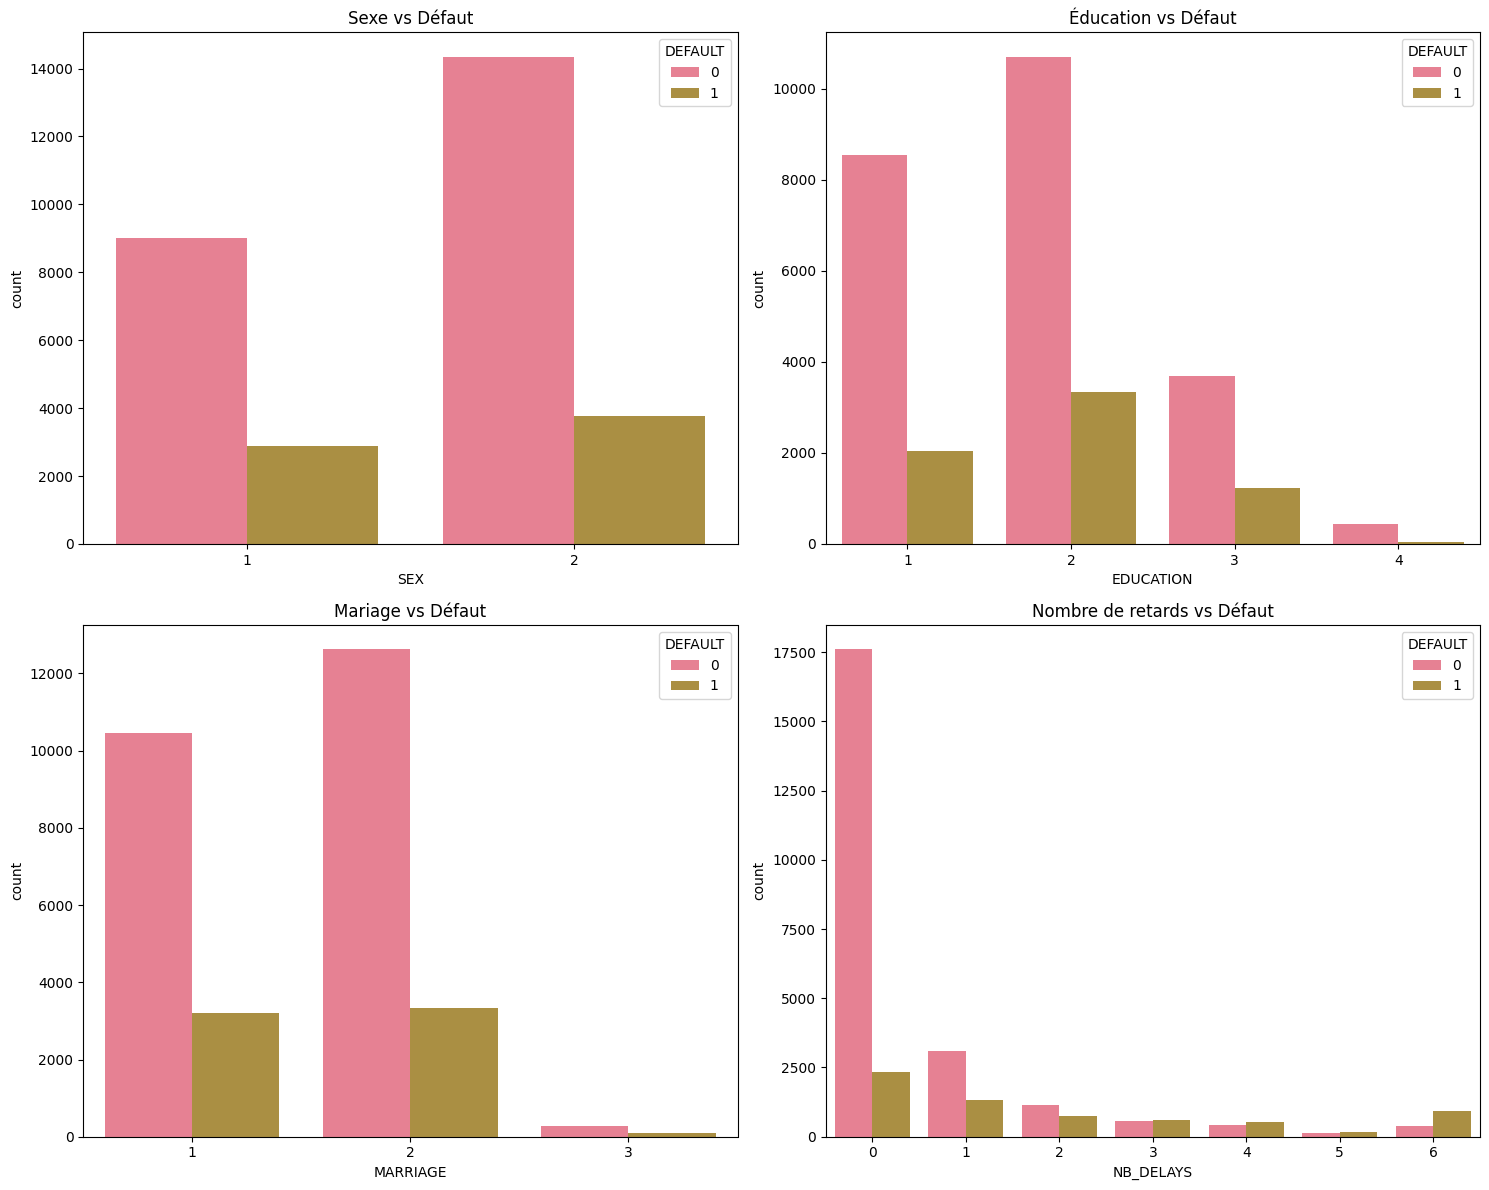

In [11]:
# 6. ANALYSE BIVARIÉE
print("\n=== ÉTAPE 5 : ANALYSE BIVARIÉE ===")

# 6.1 Taux de défaut par catégorie
for var in ['SEX', 'EDUCATION', 'MARRIAGE', 'NB_DELAYS']:
    print(f"\nTaux de défaut selon {var} (%):")
    print((df_clean.groupby(var)['DEFAULT'].mean()*100).round(1))

# 6.2 Graphiques bivariés
fig, axes = plt.subplots(2, 2, figsize=(15,12))

sns.countplot(data=df_clean, x='SEX', hue='DEFAULT', ax=axes[0,0])
axes[0,0].set_title('Sexe vs Défaut')

sns.countplot(data=df_clean, x='EDUCATION', hue='DEFAULT', ax=axes[0,1])
axes[0,1].set_title('Éducation vs Défaut')

sns.countplot(data=df_clean, x='MARRIAGE', hue='DEFAULT', ax=axes[1,0])
axes[1,0].set_title('Mariage vs Défaut')

sns.countplot(data=df_clean, x='NB_DELAYS', hue='DEFAULT', ax=axes[1,1])
axes[1,1].set_title('Nombre de retards vs Défaut')

plt.tight_layout()
plt.show()



=== ÉTAPE 6 : CORRÉLATIONS ===
Corrélations avec DEFAULT :
DEFAULT              1.000000
NB_DELAYS            0.398394
MAX_DELAY            0.331036
AGE                  0.013890
PAY_TO_BILL_RATIO   -0.011391
MEAN_BILL           -0.012691
MEAN_PAY            -0.102354
LIMIT_BAL           -0.153520
Name: DEFAULT, dtype: float64


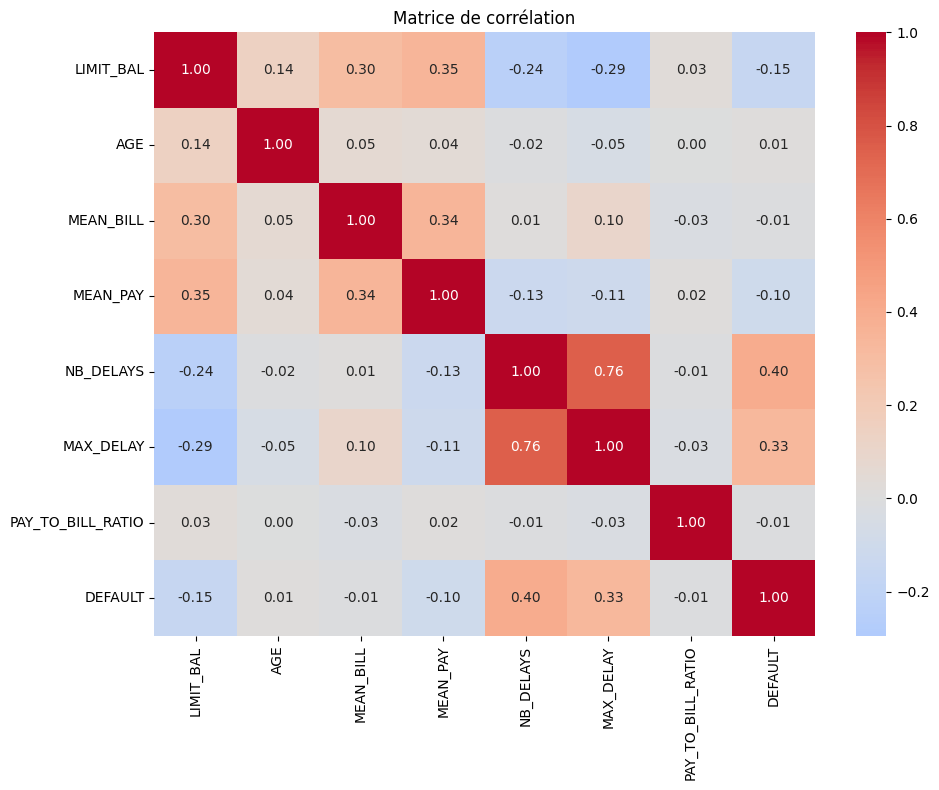

In [12]:
# 7. ANALYSE MULTIVARIÉE : CORRÉLATIONS
print("\n=== ÉTAPE 6 : CORRÉLATIONS ===")

vars_corr = [
    'LIMIT_BAL','AGE','MEAN_BILL','MEAN_PAY',
    'NB_DELAYS','MAX_DELAY','PAY_TO_BILL_RATIO','DEFAULT'
]

corr_matrix = df_clean[vars_corr].corr()

print("Corrélations avec DEFAULT :")
print(corr_matrix['DEFAULT'].sort_values(ascending=False))

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matrice de corrélation')
plt.tight_layout()
plt.show()


In [ ]:
# 8. ANALYSE MULTIVARIÉE : RÉGRESSION LOGISTIQUE
print("\n=== ÉTAPE 7 : RÉGRESSION LOGISTIQUE ===")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

features = ['LIMIT_BAL','AGE','NB_DELAYS','MAX_DELAY',
            'MEAN_BILL','MEAN_PAY','PAY_TO_BILL_RATIO']
df_model = df_clean.dropna(subset=features).copy()

X = df_model[features]
y = df_model['DEFAULT']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
logit = LogisticRegression(max_iter=1000)
logit.fit(X_train, y_train)

y_pred = logit.predict(X_test)

print("\nRapport de classification :")
print(classification_report(y_test, y_pred))
coeffs = pd.Series(logit.coef_[0], index=features)
print("\nCoefficients (log-odds) triés (positif = augmente le risque) :")
print(coeffs.sort_values(ascending=False))



=== ÉTAPE 7 : RÉGRESSION LOGISTIQUE ===

Rapport de classification :
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      6843
           1       0.61      0.27      0.37      1896

    accuracy                           0.80      8739
   macro avg       0.72      0.61      0.63      8739
weighted avg       0.78      0.80      0.77      8739


Coefficients (log-odds) triés (positif = augmente le risque) :
NB_DELAYS            0.390621
MAX_DELAY            0.189097
AGE                  0.008222
MEAN_BILL            0.000001
LIMIT_BAL           -0.000001
MEAN_PAY            -0.000024
PAY_TO_BILL_RATIO   -0.001660
dtype: float64


In [14]:
# 9. SYNTHÈSE PROFILS À RISQUE
print("\n=== ÉTAPE 8 : PROFILS À RISQUE ===")

high_risk = df_clean[df_clean['NB_DELAYS'] > 3]
print(f"Nombre de clients avec NB_DELAYS > 3 : {len(high_risk)}")
print(f"Taux de défaut dans ce groupe : {high_risk['DEFAULT'].mean():.1%}")

print("\nConclusion rapide :")
print("- Plus le nombre de retards (NB_DELAYS, MAX_DELAY) est élevé, plus le risque de défaut augmente.")
print("- Un ratio PAY_TO_BILL_RATIO plus élevé est associé à moins de défauts.")
print("- Les clients avec plusieurs retards consécutifs (>3) nécessitent une attention particulière.")



=== ÉTAPE 8 : PROFILS À RISQUE ===
Nombre de clients avec NB_DELAYS > 3 : 2590
Taux de défaut dans ce groupe : 64.1%

Conclusion rapide :
- Plus le nombre de retards (NB_DELAYS, MAX_DELAY) est élevé, plus le risque de défaut augmente.
- Un ratio PAY_TO_BILL_RATIO plus élevé est associé à moins de défauts.
- Les clients avec plusieurs retards consécutifs (>3) nécessitent une attention particulière.
